### IMPORTATIONS

In [7]:
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from kmerlib.running_window import *
from kmerlib.spectrum import *
from kmerlib.tools import *
from utils.term_colors import *

import json

# Plot config
sns.set()
%matplotlib notebook

### LOAD SEQUENCIES

In [8]:
data = [dict() for i in range(4)]

data[0]["name"] = "Aeropyrum permnix"
data[0]["type"] = "archaea"
data[0]["path"] = "./data/archaea/Aeropyrum_pernix/GCF_000011125.1_ASM1112v1_genomic.fna"

data[1]["name"] = "Methanocaldococcus fervens"
data[1]["type"] = "archaea"
data[1]["path"] = "./data/archaea/Methanocaldococcus_fervens/GCF_000023985.1_ASM2398v1_genomic.fna"

data[2]["name"] = "Acholeplasma laidlawii"
data[2]["type"] = "bacteria"
data[2]["path"] = "./data/bacteria/Acholeplasma_laidlawii/GCF_900476025.1_50465_E02_genomic.fna"

data[3]["name"] = "Campylobacter jejuni"
data[3]["type"] = "bacteria"
data[3]["path"] = "./data/bacteria/Campylobacter_jejuni/GCF_900638365.1_57428_D01_genomic.fna"

for s in data:
    s["seq"] = load_file(s["path"])

## K-mer study

### Settings

In [9]:
Ks = (2, 3, 4, 5, 6, 7, 8, 9, 12, 24, 60, 120)
win_len = 1000
step = 10

In [10]:
# ITERATE ON SPECIES
for s in data:
    if k > 60:
        n_process = 2
    elif k > 30:
        n_process = 3
    else:
        n_process = 4
        
    # Initialization
    s["kmer_study"] = dict()
    name = s["name"]
    type_ = s["type"]
    seq = s["seq"]
    print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
    
    # ITERATE ON Ks
    for k in Ks:
        t_start = time()
        full_spec = kmer_spectrum(k, seq)
        s["kmer_study"][k] = mproc_running_dist(
            k, seq, full_spec, win_len, step=step, n_process=n_process)
        t_stop = time()
        print(FG_GRAY+ "--| " +END_COLOR+ "Computing for K: " +FG_RED+ str(k) +END_COLOR
              +" | {:.3f}sec".format(t_stop - t_start))
    
# Save data
with open("running_window_data.json", "w") as f:
    json.dump(data, f)

> Aeropyrum permnix archaea
--| Computing for K: 2 | 2.746sec
--| Computing for K: 3 | 3.111sec


TypeError: 'NoneType' object is not iterable

In [30]:
# Load data
with open("running_window_data.json", "r") as f:
    data = json.load(f)

> Aeropyrum permnix archaea


<IPython.core.display.Javascript object>


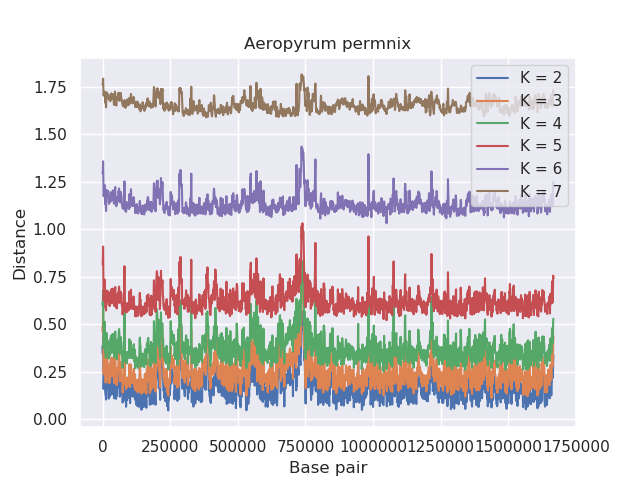

> Methanocaldococcus fervens archaea


<IPython.core.display.Javascript object>


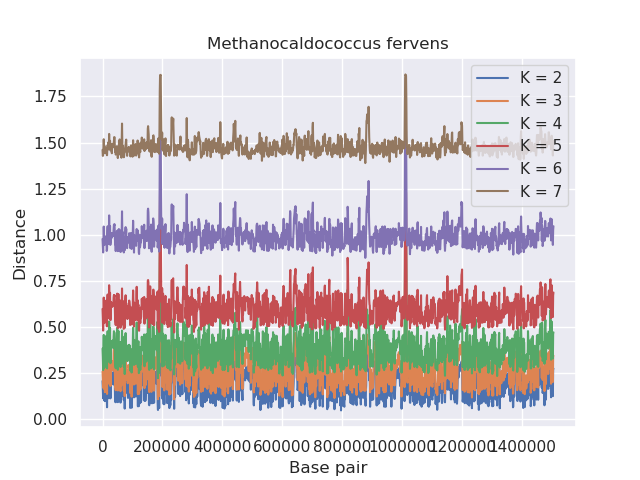

> Acholeplasma laidlawii bacteria


<IPython.core.display.Javascript object>


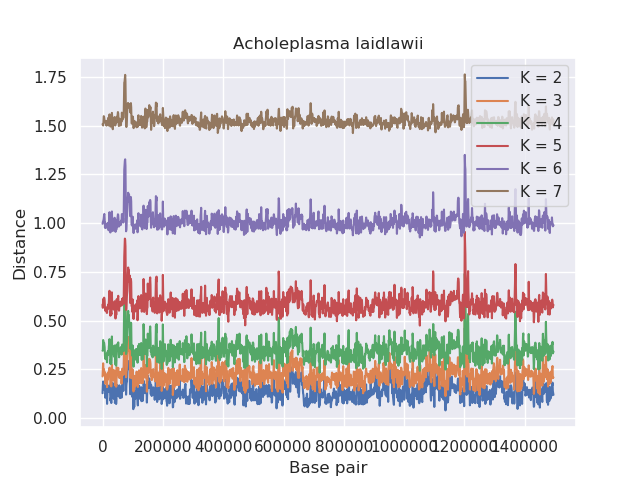

> Campylobacter jejuni bacteria


<IPython.core.display.Javascript object>


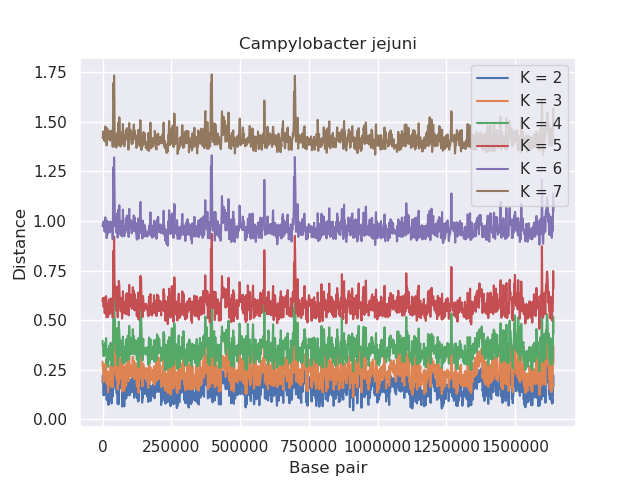

In [34]:
for s in data:
    # Initialization
    name = s["name"]
    type_ = s["type"]
    seq = s["seq"]
    print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
    plt.figure()
    
    for k in Ks:
        distances = s["kmer_study"][k]
        bp = get_idx(k, seq, win_len, step)
        plt.plot(bp, distances, label="K = {}".format(k))
    # Configure plot
    plt.xlabel('Base pair')
    plt.ylabel('Distance')
    plt.title(name)
    plt.legend()
plt.show()

20.0